In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
bacterial_strains = ['Enterobacter_aerogenes',
                    'Enterococcus_faecalis',
                    'Eschericia_coli',
                    'Listeria_innocua', 
                    'Listeria_monocytogenes', 
                    'Rhodococcus_equii', 
                    'S_abony', 
                    'Shigella_boydi', 
                    'Staphylococcus_aureus']

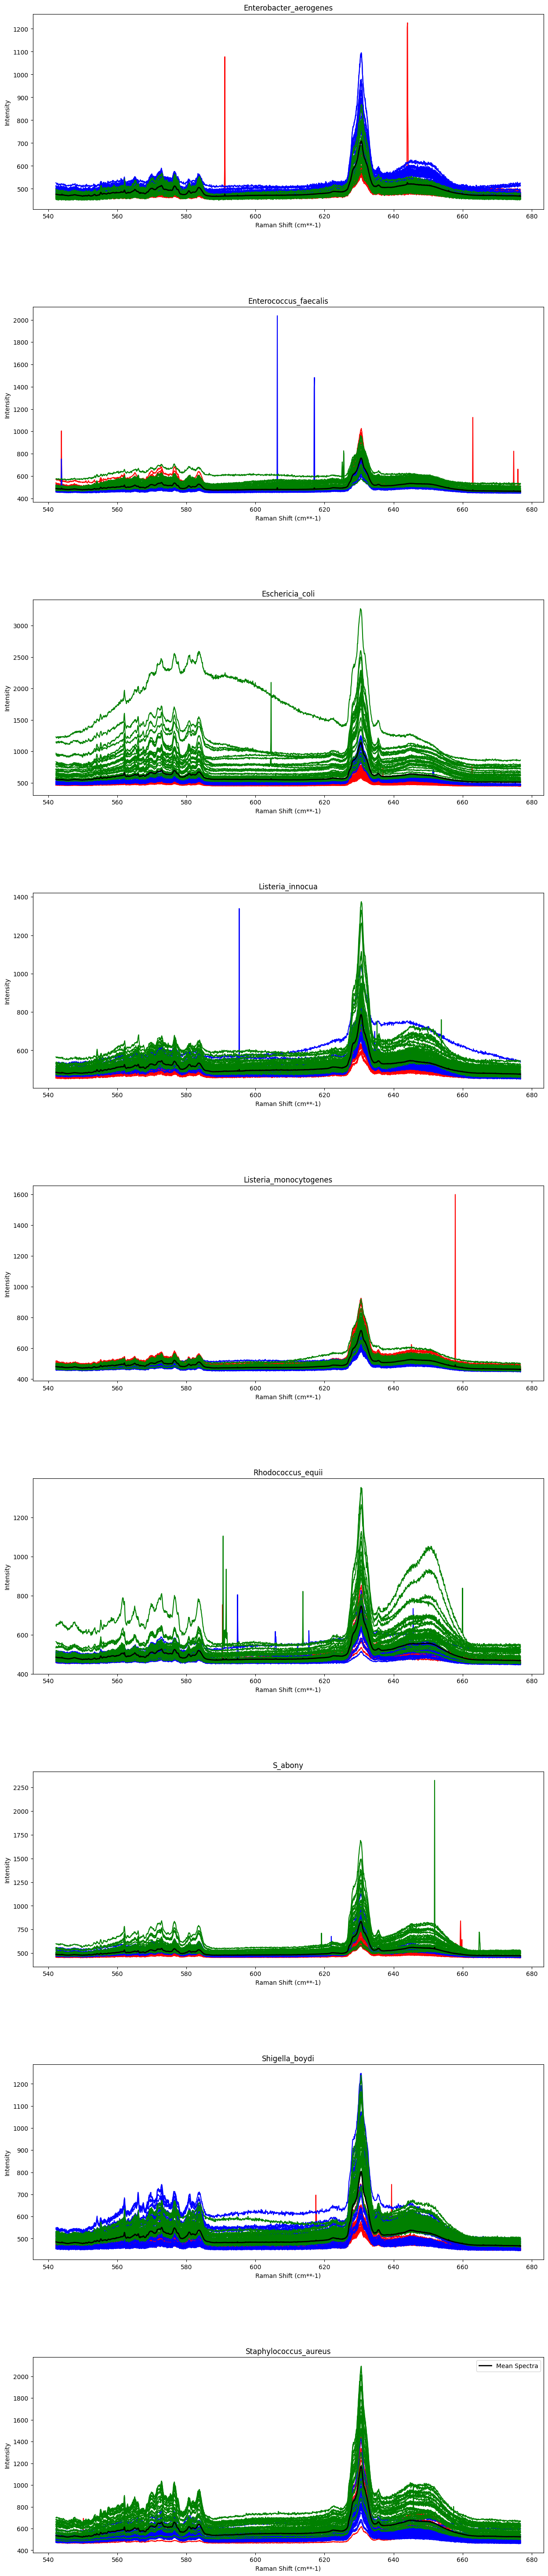

In [3]:
fig, axs = plt.subplots(9, 1, sharex=False, sharey=False ,gridspec_kw={'hspace': 0.5, 'wspace': 0.5},figsize=(15,75))

mean_spectra = []
for i, strain in enumerate(bacterial_strains):
    spectra_list = []
    data = pd.read_csv(f"../9_Strains/setA/{strain}_1.txt", sep="\t", header=None)
    x = data.iloc[:, 0]
    Y = data.iloc[:, 1:]
    
    for y in Y.T.values:
        axs[i].plot(x, y, color="red")
        spectra_list.append(y)

    data = pd.read_csv(f"../9_Strains/setA/{strain}_2.txt", sep="\t", header=None)
    x = data.iloc[:, 0]
    Y = data.iloc[:, 1:]
    
    for y in Y.T.values:
        axs[i].plot(x, y, color="blue")
        spectra_list.append(y)

    data = pd.read_csv(f"../9_Strains/setB/{strain}_3.txt", sep="\t", header=None)
    x = data.iloc[:, 0]
    Y = data.iloc[:, 1:]
    
    for y in Y.T.values:
        axs[i].plot(x, y, color="green")
        spectra_list.append(y)
    
    ms = np.mean(spectra_list, axis=0)
    mean_spectra.append((ms))
    axs[i].plot(x, ms, color="black", linewidth=2, label='Mean Spectra')

    axs[i].set_xlabel('Raman Shift (cm**-1)')
    axs[i].set_ylabel('Intensity')
    axs[i].set_title(f'{strain}')
plt.legend()
plt.savefig('Individual_Variance', dpi=300, bbox_inches='tight')
plt.show()
    

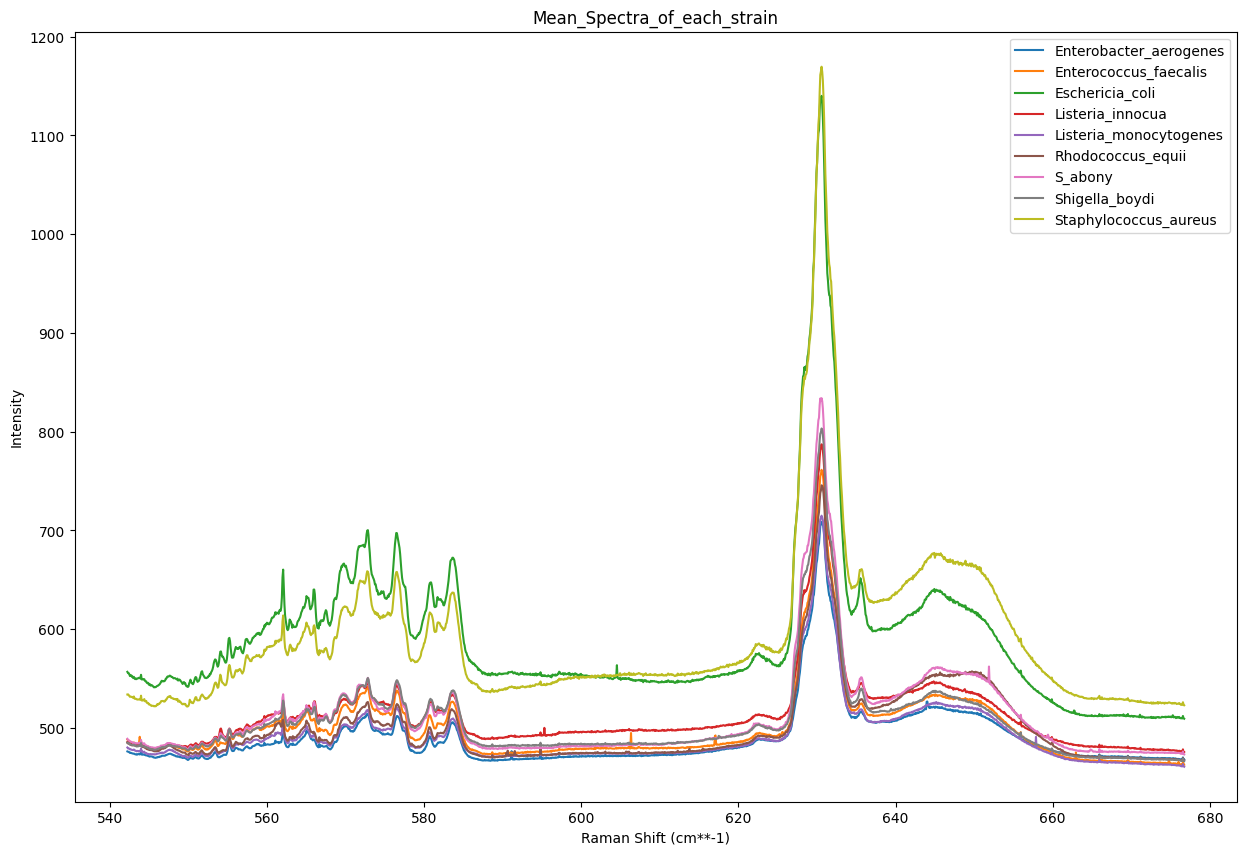

In [4]:
plt.figure(figsize=(15, 10))
for i, strain in enumerate(bacterial_strains):
    plt.plot(x, mean_spectra[i], label=strain)

plt.legend()
plt.xlabel('Raman Shift (cm**-1)')
plt.ylabel('Intensity')
plt.title('Mean_Spectra_of_each_strain')
plt.savefig('Mean_Spectra_of_each_strain', dpi=300, bbox_inches='tight')
plt.show()
